In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("charunisa/chatgpt-sentiment-analysis")

print("Path to dataset files:", path)

In [ ]:
pip install pandas langdetect


In [ ]:
!pip install langdetect

In [ ]:
import pandas as pd
import re
from langdetect import detect, DetectorFactory

# Ensure consistent language detection
DetectorFactory.seed = 0

def clean_text(text):
    # Remove links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove images and videos (assuming they are represented by links or tags)
    text = re.sub(r'!\[.*?\]\(.*?\)|<img[^>]*>|<video[^>]*>', '', text)
    # Remove any non-ASCII characters (to keep only English text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text.strip()

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

def process_csv(input_file, output_file, text_column='Tweets'):
    # Read the CSV file
    df = pd.read_csv(input_file)

    # Check if the specified column exists in the DataFrame
    if text_column not in df.columns:
        raise KeyError(f"The column '{text_column}' does not exist in the CSV file.")

    # Clean the specified text column
    df[text_column] = df[text_column].astype(str).apply(clean_text)

    # Filter out rows that do not contain English text
    df = df[df[text_column].apply(is_english)]

    # Save the cleaned data to a new CSV file
    df.to_csv(output_file, index=False)

# Example usage
input_file = '/file.csv'  # Replace with your input CSV file path
output_file = 'cleaned_data.csv'  # Output file for cleaned data
text_column = 'tweets'  # Name of the text column to be cleaned

process_csv(input_file, output_file, text_column)


In [ ]:
pip install langdetect

In [ ]:
import pandas as pd
import re

def clean_text(text):
    # Remove links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove image and video tags or patterns
    text = re.sub(r'!\[.*?\]\(.*?\)|<img[^>]*>|<video[^>]*>', '', text)
    # Remove any non-ASCII characters (to keep only English text and basic punctuation)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Keep only English characters and basic punctuation
    text = re.sub(r'[^a-zA-Z0-9\s.,?!]', '', text)
    return text.strip()

def process_csv(input_file, output_file, text_column='tweets'):
    # Read the CSV file
    df = pd.read_csv(input_file, encoding='ISO-8859-1', on_bad_lines='skip')

    # Check if the specified column exists in the DataFrame
    if text_column not in df.columns:
        raise KeyError(f"The column '{text_column}' does not exist in the CSV file.")

    # Clean the specified text column
    df[text_column] = df[text_column].astype(str).apply(clean_text)

    # Filter out rows with too few ASCII characters (non-English text approximation)
    df = df[df[text_column].str.contains(r'[a-zA-Z]', regex=True)]

    # Save the cleaned data to a new CSV file
    df.to_csv(output_file, index=False)

# Example usage
input_file = '/mnt/data/file.csv'  # Replace with your input CSV file path
output_file = '/mnt/data/cleaned_data.csv'  # Output file for cleaned data
text_column = 'tweets'  # Name of the text column to be cleaned

process_csv(input_file, output_file, text_column)
print(f"Cleaned data saved to {output_file}")



In [ ]:
import pandas as pd
import re
import os

def clean_text(text):
    # Remove links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove image and video tags or patterns
    text = re.sub(r'!\[.*?\]\(.*?\)|<img[^>]*>|<video[^>]*>', '', text)
    # Remove any non-ASCII characters (to keep only English text and basic punctuation)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Keep only English characters and basic punctuation
    text = re.sub(r'[^a-zA-Z0-9\s.,?!]', '', text)
    return text.strip()

def process_csv(input_file, output_file, text_column='tweets'):
    # Read the CSV file, trying different encodings and error handling
    try:
        df = pd.read_csv(input_file, encoding='utf-8', on_bad_lines='skip') # Try UTF-8 first
    except pd.errors.ParserError:
        try:
            df = pd.read_csv(input_file, encoding='ISO-8859-1', on_bad_lines='skip') # Try ISO-8859-1 if UTF-8 fails
        except pd.errors.ParserError:
            df = pd.read_csv(input_file, encoding='latin-1', on_bad_lines='skip', engine='python') # Try latin-1 with Python engine

    # Check if the specified column exists in the DataFrame
    if text_column not in df.columns:
        raise KeyError(f"The column '{text_column}' does not exist in the CSV file.")

    # Clean the specified text column
    df[text_column] = df[text_column].astype(str).apply(clean_text)

    # Filter out rows with too few ASCII characters (non-English text approximation)
    df = df[df[text_column].str.contains(r'[a-zA-Z]', regex=True)]

    # Remove duplicate rows based on the text column
    df = df.drop_duplicates(subset=[text_column])

    # Create the output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_file), exist_ok=True) # Create directory if it doesn't exist

    # Save the cleaned data to a new CSV file
    df.to_csv(output_file, index=False)

# Example usage
input_file = '/content/file.csv'  # Replace with your input CSV file path
output_file = '/mnt/data/cleaned_data.csv'  # Output file for cleaned data
text_column = 'tweets'  # Name of the text column to be cleaned

process_csv(input_file, output_file, text_column)
print(f"Cleaned data saved to {output_file}")




In [ ]:
import pandas as pd
import re

# Function to lowercase and remove punctuation from text
def clean_text_lower_nopunct(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)  # \w matches any word character; \s matches whitespace
    return text.strip()

# Main function to process CSV file
def process_csv(file_path, output_path):
    # Load data from CSV file
    data = pd.read_csv(file_path)

    # Check if 'text' column exists
    if 'tweets' not in data.columns:
        raise KeyError("The CSV file does not contain a 'tweets' column.")

    # Apply text cleaning to the 'text' column
    data['tweets'] = data['tweets'].astype(str).apply(clean_text_lower_nopunct)

    # Save cleaned data to a new CSV file
    data.to_csv(output_path, index=False)
    print(f"Cleaned data saved to {output_path}")

# Example usage
file_path = '/content/cleaned_data.csv'  # Path to the input CSV file
output_path = '/content/cleaned_chatgpt1.csv'  # Path to save the output CSV file
try:
    process_csv(file_path, output_path)
except KeyError as e:
    print(e)



Creating bar plot for the labels column...


<ipython-input-31-4ccfe7cbb491>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='labels', palette="Set2")


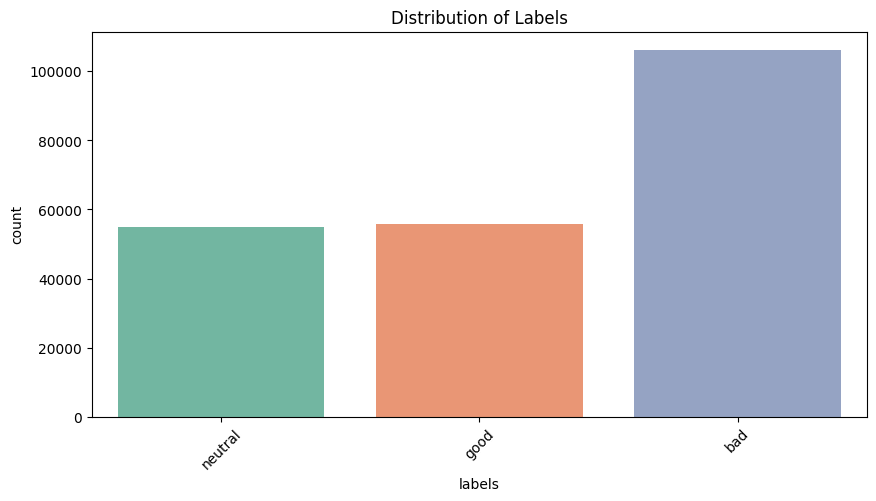


Bar plot for labels is complete!


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "cleaned_chatgpt1.csv"  # Specify your file name directly
df = pd.read_csv(file_path)

# Ensure the 'labels' column exists
if 'labels' not in df.columns:
    raise ValueError("Ensure your dataset has a 'labels' column.")

# Create bar plot for the labels column
print("\nCreating bar plot for the labels column...")
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='labels', palette="Set2")
plt.title("Distribution of Labels")
plt.xticks(rotation=45)
plt.show()

print("\nBar plot for labels is complete!")


In [ ]:
import re
from nltk.corpus import stopwords
import nltk
import pandas as pd

# File path
file_path = 'cleaned_chatgpt1.csv'

# Load the dataset
tweets_df = pd.read_csv(file_path)

# Download the stopwords dataset if not already downloaded
nltk.download('stopwords')

# Define a function to preprocess the text
def preprocess_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return text

# Apply the preprocessing to the 'tweets' column
tweets_df['tweets'] = tweets_df['tweets'].apply(preprocess_text)

# Save the preprocessed data to a new file if needed
tweets_df.to_csv('cleaned_preprocessed_chatgpt1.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the data
file_path = '/content/cleaned_chatgpt1.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print("Data preview:")
print(data.head())

# Assuming the text column is named 'text' (change it to match your column name)
text_column = 'tweets'  # Replace with the actual column name
if text_column not in data.columns:
    raise ValueError(f"Column '{tweets}' not found in the dataset. Please check the column names.")

# Extract the text data
texts = data[text_column].astype(str)  # Convert to string to ensure compatibility

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust 'max_features' as needed

# Transform the text data to numeric vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# Convert the matrix to a DataFrame for easier handling
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

# Display the resulting TF-IDF DataFrame
print("\nTF-IDF DataFrame preview:")
print(tfidf_df.head())


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the data
file_path = '/content/cleaned_data.csv'  # Ensure this matches the correct file path
data = pd.read_csv(file_path)

# Define the feature and target columns
text_column = 'tweets'  # Column containing the text data
label_column = 'labels'  # Column containing the target labels

if text_column not in data.columns or label_column not in data.columns:
    raise ValueError(f"Columns '{text_column}' or '{label_column}' not found in the dataset. Please check the column names.")

# Extract features and labels
texts = data[text_column].astype(str)  # Ensure text data is string
labels = data[label_column]

# Convert labels to numeric (if not already)
labels = labels.astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Transform the text data into TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)


Processing file: /content/cleaned_chatgpt1.csv


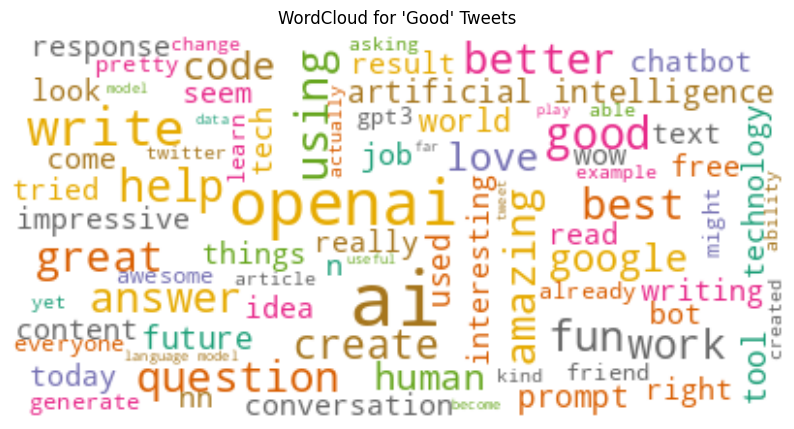

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def load_tweets_from_csv(file_paths):
    """
    Loads 'good' labeled tweets from a list of CSV file paths.

    Args:
        file_paths (list): List of CSV file paths.

    Returns:
        list: List of 'good' labeled tweets.
    """
    good_tweets = []
    for file_path in file_paths:
        print(f"Processing file: {file_path}")
        try:
            df = pd.read_csv(file_path)

            if {'tweets', 'labels'}.issubset(df.columns):  # Check for required columns
                good_tweets.extend(df.loc[df['labels'] == 'good', 'tweets'].dropna().tolist())
            else:
                print(f"Columns 'tweets' or 'labels' not found in {file_path}.")
        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    return good_tweets

def generate_wordcloud(text, stopwords, title="WordCloud"):
    """
    Generates and displays a word cloud from the given text.

    Args:
        text (str): Combined text for word cloud.
        stopwords (set): Set of stopwords to exclude.
        title (str): Title of the word cloud.
    """
    if not text.strip():
        print("No valid text provided to generate word cloud.")
        return

    wordcloud = WordCloud(
        max_font_size=40,
        max_words=80,
        background_color="white",
        stopwords=stopwords,
        colormap='Dark2_r'
    ).generate(text)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

def main():
    # List of CSV file paths
    file_paths = [
        r"/content/cleaned_chatgpt1.csv"
        # Add more file paths as needed
    ]

    # Custom stopwords
    custom_stopwords = {
        'chatgpt', 'i', 'you', 'me', 'a', 'us', 'im', 'tri', 'dont', 'realli',
        'educ', 'see', 'even', 'know', 'ive', 'make', 'go', 'one', 'thing', 'kid',
        'someth', 'give', 'take', 'say', 'way', 'gener', 'actual', 's', 'm', 'point',
        'many', 'x200B', 'amp', 'Think', 'many', 'feel', 'now', 'first', 'need', 'part',
        'going', 'basic', 'well', 'two', 'never', 'new', 'basics', 'year', 'lot', 'got',
        'back', 'asked', 'word', 'https', 'didnt', 'something', 'dont', 'please', 'hi',
        'chat', 'gle', 'forms', 'show', 'allow', 'thank', 'thought', 'getting', 'show',
        'reasearch', 'anyone', 'draft', 'process', 'case', 'didn t', 'note', 'anything',
        'much', 'don t', 't', 'try', 'told', 'still', 'use', 'want', 'share', 'etc',
        'use', 'sure', 'may', 'still', 'topic', 'ask', 'words', 'find', 'video', 'trying',
        'app', 'made', 'PDF', 'people', 'words', 'start', 'trying', 'concept', 'will',
        'time', 'day', 'hour', 'life', 'bad', 'understand', 'let', 'hours',
    }
    stopwords = STOPWORDS.union(custom_stopwords)

    # Load tweets and generate word cloud
    good_tweets = load_tweets_from_csv(file_paths)
    if good_tweets:
        combined_text = ' '.join(good_tweets)
        generate_wordcloud(combined_text, stopwords, title="WordCloud for 'Good' Tweets")
    else:
        print("No 'good' tweets found in the provided files.")

if __name__ == "__main__":
    main()


Processing file: /content/cleaned_chatgpt1.csv


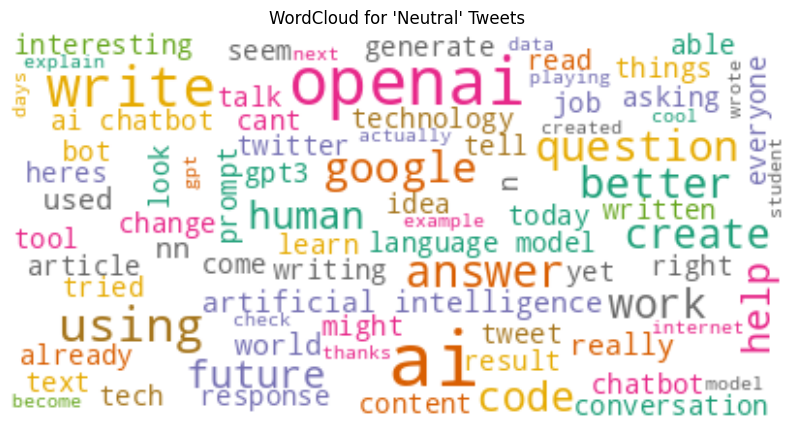

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def load_tweets(file_paths, label):
    """
    Loads tweets with the specified label from a list of CSV file paths.

    Args:
        file_paths (list): List of file paths to CSV files.
        label (str): The label to filter tweets by.

    Returns:
        list: A list of tweets with the specified label.
    """
    tweets = []
    for file_path in file_paths:
        print(f"Processing file: {file_path}")
        try:
            df = pd.read_csv(file_path)

            if {'tweets', 'labels'}.issubset(df.columns):  # Check if required columns exist
                tweets.extend(df.loc[df['labels'] == label, 'tweets'].dropna().tolist())
            else:
                print(f"Columns 'tweets' or 'labels' not found in {file_path}.")
        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except Exception as e:
            print(f"An error occurred while processing {file_path}: {e}")
    return tweets

def generate_wordcloud(text, stopwords, title):
    """
    Generates and displays a word cloud.

    Args:
        text (str): Text to generate the word cloud from.
        stopwords (set): Stopwords to exclude from the word cloud.
        title (str): Title of the word cloud.
    """
    if not text.strip():
        print("No valid text provided to generate word cloud.")
        return

    wordcloud = WordCloud(
        max_font_size=40,
        max_words=80,
        background_color="white",
        stopwords=stopwords,
        colormap='Dark2_r'
    ).generate(text)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

def main():
    # List of CSV file paths
    file_paths = [
        r"/content/cleaned_chatgpt1.csv"
        # Add more file paths as needed
    ]

    # Custom stopwords
    custom_stopwords = {
        'chatgpt', 'i', 'you', 'me', 'a', 'us', 'im', 'tri', 'dont', 'realli',
        'educ', 'see', 'even', 'know', 'ive', 'make', 'go', 'one', 'thing', 'kid',
        'someth', 'give', 'take', 'say', 'way', 'gener', 'actual', 's', 'm', 'point',
        'many', 'x200B', 'amp', 'Think', 'many', 'feel', 'now', 'first', 'need', 'part',
        'going', 'basic', 'well', 'two', 'never', 'new', 'basics', 'year', 'lot', 'got',
        'back', 'asked', 'word', 'https', 'didnt', 'something', 'dont', 'please', 'hi',
        'chat', 'gle', 'forms', 'show', 'allow', 'thank', 'thought', 'getting', 'show',
        'reasearch', 'anyone', 'draft', 'process', 'case', 'didn t', 'note', 'anything',
        'much', 'don t', 't', 'try', 'told', 'still', 'use', 'want', 'share', 'etc',
        'use', 'sure', 'may', 'still', 'topic', 'ask', 'words', 'find', 'video', 'trying',
        'app', 'made', 'PDF', 'people', 'words', 'start', 'trying', 'concept', 'will',
        'time', 'day', 'hour', 'life', 'good', 'bad', 'understand', 'let', 'hours'
    }
    stopwords = STOPWORDS.union(custom_stopwords)

    # Load tweets labeled as 'neutral'
    neutral_tweets = load_tweets(file_paths, label='neutral')

    # Generate word cloud if tweets are available
    if neutral_tweets:
        combined_text = ' '.join(neutral_tweets)
        generate_wordcloud(combined_text, stopwords, title="WordCloud for 'Neutral' Tweets")
    else:
        print("No 'neutral' tweets available from the specified CSV files.")

if __name__ == "__main__":
    main()


Processing file: /content/cleaned_chatgpt1.csv


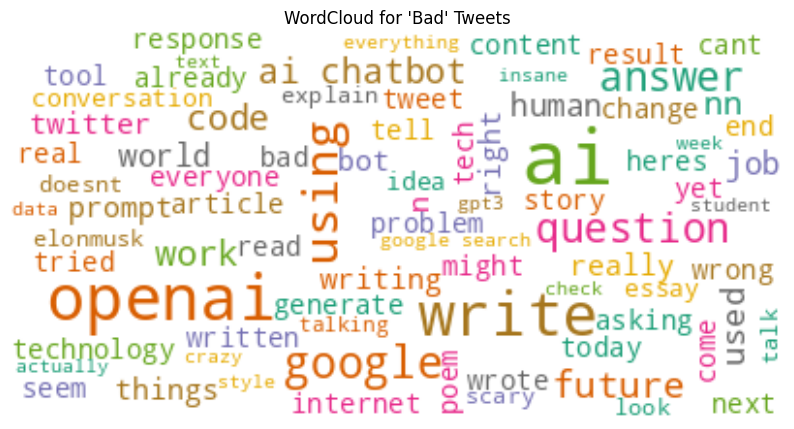

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def load_tweets(file_paths, label):
    """
    Load tweets with the specified label from the given CSV files.

    Args:
        file_paths (list): List of file paths to CSV files.
        label (str): Label to filter the tweets by.

    Returns:
        list: List of tweets with the specified label.
    """
    tweets = []
    for file_path in file_paths:
        print(f"Processing file: {file_path}")
        try:
            df = pd.read_csv(file_path)

            if {'tweets', 'labels'}.issubset(df.columns):  # Check for required columns
                tweets.extend(df.loc[df['labels'] == label, 'tweets'].dropna().tolist())
            else:
                print(f"Columns 'tweets' or 'labels' not found in {file_path}.")
        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    return tweets

def generate_wordcloud(tweets, stopwords, title):
    """
    Generate and display a word cloud for the given tweets.

    Args:
        tweets (list): List of tweets to process.
        stopwords (set): Set of stopwords to exclude.
        title (str): Title of the word cloud plot.
    """
    if not tweets:
        print(f"No tweets available to generate word cloud for '{title}'.")
        return

    combined_text = ' '.join(tweets)
    if not combined_text.strip():
        print(f"No valid text available for '{title}' word cloud.")
        return

    wordcloud = WordCloud(
        max_font_size=40,
        max_words=80,
        background_color="white",
        stopwords=stopwords,
        colormap='Dark2_r'
    ).generate(combined_text)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

def main():
    # List of CSV file paths
    file_paths = [
        r"/content/cleaned_chatgpt1.csv"
        # Add more file paths as needed
    ]

    # Custom stopwords
    custom_stopwords = {
        'chatgpt', 'i', 'you', 'me', 'a', 'us', 'im', 'tri', 'dont', 'realli',
        'educ', 'see', 'even', 'know', 'ive', 'make', 'go', 'one', 'thing', 'kid',
        'someth', 'give', 'take', 'say', 'way', 'gener', 'actual', 's', 'm', 'point',
        'many', 'x200B', 'amp', 'Think', 'many', 'feel', 'now', 'first', 'need', 'part',
        'going', 'basic', 'well', 'two', 'never', 'new', 'basics', 'year', 'lot', 'got',
        'back', 'asked', 'word', 'https', 'didnt', 'something', 'dont', 'please', 'hi',
        'chat', 'gle', 'forms', 'show', 'allow', 'thank', 'thought', 'getting', 'show',
        'reasearch', 'anyone', 'draft', 'process', 'case', 'didn t', 'note', 'anything',
        'much', 'don t', 't', 'try', 'told', 'still', 'use', 'want', 'share', 'etc',
        'use', 'sure', 'may', 'still', 'topic', 'ask', 'words', 'find', 'video', 'trying',
        'app', 'made', 'PDF', 'people', 'words', 'start', 'trying', 'concept', 'will',
        'time', 'day', 'hour', 'life', 'good', 'understand', 'let', 'hours'
    }
    stopwords = STOPWORDS.union(custom_stopwords)

    # Load tweets labeled as 'bad'
    bad_tweets = load_tweets(file_paths, label='bad')

    # Generate word cloud for 'bad' tweets
    generate_wordcloud(bad_tweets, stopwords, title="WordCloud for 'Bad' Tweets")

if __name__ == "__main__":
    main()


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np

# Load the dataset
file_path = '/content/cleaned_chatgpt1.csv'  # Replace with the path to your file
df = pd.read_csv(file_path)

# Step 1: Tokenize tweets
def tokenize_tweet(tweet):
    if pd.notnull(tweet):
        return str(tweet).split()
    return []

df['tokenized_tweets'] = df['tweets'].apply(tokenize_tweet)

# Step 2: Prepare data for Word2Vec
sentences = df['tokenized_tweets'].tolist()

# Step 3: Train Word2Vec model
try:
    word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, seed=42)
    print("Word2Vec training successful. Vocabulary size:", len(word2vec_model.wv))
except Exception as e:
    print(f"Error training Word2Vec model: {e}")

# Save Word2Vec model (optional)
word2vec_model.save("word2vec_model.model")

# Step 4: Create feature vectors for each tweet by averaging word vectors
def vectorize_tweet(tweet, model, vector_size):
    word_vectors = [model.wv[word] for word in tweet if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(vector_size)  # Return a zero vector if no words in the tweet are in the vocabulary
    return np.mean(word_vectors, axis=0)

try:
    df['tweet_vectors'] = df['tokenized_tweets'].apply(lambda tweet: vectorize_tweet(tweet, word2vec_model, 100))
    print("Vectorization successful. Example vector:", df['tweet_vectors'].iloc[0])
except Exception as e:
    print(f"Error vectorizing tweets: {e}")

# Convert list of vectors into a feature matrix
try:
    X = np.vstack(df['tweet_vectors'].values)
    print("Feature matrix created. Shape:", X.shape)
except Exception as e:
    print(f"Error creating feature matrix: {e}")

# Ensure labels column exists and save the feature matrix and labels
if 'labels' in df.columns:
    try:
        y = df['labels']
        np.save("tweet_features.npy", X)
        y.to_csv("tweet_labels.csv", index=False)
        print("Features and labels saved successfully.")
    except Exception as e:
        print(f"Error saving features and labels: {e}")
else:
    print("Labels column not found in the dataset.")


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np

# Load the dataset
file_path = '/content/cleaned_chatgpt1.csv'  # Replace with the path to your file
df = pd.read_csv(file_path)

# Step 1: Tokenize tweets
def tokenize_tweet(tweet):
    if pd.notnull(tweet):
        return str(tweet).split()
    return []

df['tokenized_tweets'] = df['tweets'].apply(tokenize_tweet)

# Step 2: Prepare data for Word2Vec
sentences = df['tokenized_tweets'].tolist()

# Step 3: Train Word2Vec model
try:
    word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, seed=42)
    print("Word2Vec training successful. Vocabulary size:", len(word2vec_model.wv))
except Exception as e:
    print(f"Error training Word2Vec model: {e}")

# Save Word2Vec model (optional)
word2vec_model.save("word2vec_model.model")

# Step 4: Create feature vectors for each tweet by averaging word vectors
def vectorize_tweet(tweet, model, vector_size):
    word_vectors = [model.wv[word] for word in tweet if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(vector_size)  # Return a zero vector if no words in the tweet are in the vocabulary
    return np.mean(word_vectors, axis=0)

try:
    df['tweet_vectors'] = df['tokenized_tweets'].apply(lambda tweet: vectorize_tweet(tweet, word2vec_model, 100))
    print("Vectorization successful. Example vector:", df['tweet_vectors'].iloc[0])
except Exception as e:
    print(f"Error vectorizing tweets: {e}")

# Combine vectors and labels into one DataFrame
try:
    vectors_df = pd.DataFrame(df['tweet_vectors'].tolist(), columns=[f'vector_{i}' for i in range(100)])
    combined_df = pd.concat([df['labels'], vectors_df], axis=1)
    combined_df.to_csv("tweet_vectors_with_labels.csv", index=False)
    print("Combined vectors and labels saved to 'tweet_vectors_with_labels.csv'.")
except Exception as e:
    print(f"Error combining vectors and labels: {e}")


In [ ]:
pip install pandas scikit-learn

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load the reduced dataset
file_path = '/content/cleaned_chatgpt1.csv'
reduced_data = pd.read_csv(file_path)

# Validate columns
text_column = 'tweets'
label_column = 'labels'
if text_column not in reduced_data.columns or label_column not in reduced_data.columns:
    raise ValueError("Ensure the dataset contains 'tweets' and 'labels' columns.")

# Extract features (X) and labels (y)
X = reduced_data[text_column].astype(str)
y = reduced_data[label_column]

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # Use bigrams and increase features
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Optimize Decision Tree hyperparameters using GridSearchCV
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2
)

grid_search.fit(X_resampled, y_resampled)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print evaluation results
print("Optimized Decision Tree Model Results")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Save results to a file
output_file = '/content/optimized_decision_tree_model_results.txt'
with open(output_file, 'w') as f:
    f.write("Optimized Decision Tree Model Results\n")
    f.write(f"Test Accuracy: {accuracy:.4f}\n\n")
    f.write("Classification Report:\n")
    f.write(report)

print(f"\nResults saved to {output_file}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  11.2s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   9.9s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  11.5s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=  11.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=  11.3s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=  10.8s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=  10.6s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, m

In [ ]:
# Import necessary libraries

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score



# Load the dataset

file_path = '/content/cleaned_chatgpt1.csv'  # Ensure the CSV file is in the same directory or adjust the path

dataset = pd.read_csv(file_path)



# Validate columns

text_column = 'tweets'

label_column = 'labels'

if text_column not in dataset.columns or label_column not in dataset.columns:

    raise ValueError(f"The dataset must contain '{text_column}' and '{label_column}' columns.")



# Extract features (X) and labels (y)

X = dataset[text_column].astype(str)  # Ensure the text data is treated as strings

y = dataset[label_column]



# Encode labels into integers

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)



# Convert text data to TF-IDF features

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Use bigrams for better representation

X_tfidf = vectorizer.fit_transform(X)



# Split the dataset into training (80%) and testing (20%) sets

X_train, X_test, y_train, y_test = train_test_split(

    X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded

)



# Initialize and train the Logistic Regression model

log_reg = LogisticRegression(random_state=42, max_iter=200)

log_reg.fit(X_train, y_train)



# Evaluate the model on the test set

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)



# Display evaluation results

print("Logistic Regression Model Results")

print(f"Test Accuracy: {accuracy:.4f}")

print("\nClassification Report:")

print(report)



Logistic Regression Model Results
Test Accuracy: 0.8051

Classification Report:
              precision    recall  f1-score   support

         bad       0.85      0.93      0.89     21236
        good       0.80      0.77      0.78     11135
     neutral       0.71      0.59      0.65     10994

    accuracy                           0.81     43365
   macro avg       0.78      0.77      0.77     43365
weighted avg       0.80      0.81      0.80     43365



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = '/content/cleaned_chatgpt1.csv'  # Adjust the path if needed

try:
    dataset = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    raise FileNotFoundError(f"File not found at {file_path}. Please check the path.")

# Validate columns
text_column = 'tweets'
label_column = 'labels'
if text_column not in dataset.columns or label_column not in dataset.columns:
    raise ValueError(f"The dataset must contain '{text_column}' and '{label_column}' columns.")
else:
    print("Columns validated.")

# Check for missing values
if dataset[[text_column, label_column]].isnull().any().any():
    print("Missing values found. Dropping missing rows.")
    dataset = dataset.dropna(subset=[text_column, label_column])

# Extract features (X) and labels (y)
X = dataset[text_column].astype(str)  # Ensure the text data is treated as strings
y = dataset[label_column]

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Use bigrams for better representation
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)  # Default parameters
random_forest.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display results
print("Random Forest Model Results")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)


Dataset loaded successfully.
Columns validated.
Random Forest Model Results
Test Accuracy: 0.7592

Classification Report:
              precision    recall  f1-score   support

         bad       0.77      0.93      0.84     21236
        good       0.73      0.74      0.73     11135
     neutral       0.75      0.45      0.57     10994

    accuracy                           0.76     43365
   macro avg       0.75      0.71      0.71     43365
weighted avg       0.76      0.76      0.75     43365



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = '/content/cleaned_chatgpt1.csv'  # Adjust the path if needed

try:
    dataset = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    raise FileNotFoundError(f"File not found at {file_path}. Please check the path.")

# Validate columns
text_column = 'tweets'
label_column = 'labels'
if text_column not in dataset.columns or label_column not in dataset.columns:
    raise ValueError(f"The dataset must contain '{text_column}' and '{label_column}' columns.")
else:
    print("Columns validated.")

# Check for missing values
if dataset[[text_column, label_column]].isnull().any().any():
    print("Missing values found. Dropping missing rows.")
    dataset = dataset.dropna(subset=[text_column, label_column])

# Extract features (X) and labels (y)
X = dataset[text_column].astype(str)  # Ensure the text data is treated as strings
y = dataset[label_column]

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Use bigrams for better representation
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Initialize the AdaBoost model with a simple decision stump as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Define a smaller hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100],          # Number of boosting rounds
    'learning_rate': [0.1, 1],         # Learning rate
    'estimator__max_depth': [1, 2]     # Depth of the base estimator
}

# Use RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=adaboost,
    param_distributions=param_grid,
    n_iter=10,  # Try 10 random combinations
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Train the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Retrieve the best model
best_model = random_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display results
print("Optimized AdaBoost Model Results")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Display the best hyperparameters
print("\nBest Hyperparameters:")
print(random_search.best_params_)


Dataset loaded successfully.
Columns validated.
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Optimized AdaBoost Model Results
Test Accuracy: 0.6003

Classification Report:
              precision    recall  f1-score   support

         bad       0.58      0.97      0.73     21236
        good       0.69      0.45      0.55     11135
     neutral       0.52      0.04      0.08     10994

    accuracy                           0.60     43365
   macro avg       0.60      0.49      0.45     43365
weighted avg       0.60      0.60      0.52     43365


Best Hyperparameters:
{'n_estimators': 100, 'learning_rate': 1, 'estimator__max_depth': 2}


In [ ]:
pip install --upgrade xgboost

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/cleaned_chatgpt1.csv'  # Replace with your actual file path

try:
    dataset = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    raise FileNotFoundError(f"File not found at {file_path}. Please check the path.")

# Randomly sample 100,000 rows from the dataset
if len(dataset) > 100000:
    sampled_dataset = dataset.sample(n=100000, random_state=42).reset_index(drop=True)
    print(f"Dataset sampled to 100,000 rows.")
else:
    print("The dataset contains fewer than 100,000 rows. Using the entire dataset.")
    sampled_dataset = dataset

# Save the sampled dataset to a new file (100000)
output_file = 'sampled_dataset.csv'
sampled_dataset.to_csv(output_file, index=False)
print(f"Sampled dataset saved to {output_file}.")


Dataset loaded successfully.
Dataset sampled to 100,000 rows.
Sampled dataset saved to sampled_dataset.csv.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import DMatrix, cv, train
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = '/content/sampled_dataset.csv'  # Adjust the path if needed

try:
    dataset = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    raise FileNotFoundError(f"File not found at {file_path}. Please check the path.")

# Randomly sample 100,000 rows
if len(dataset) > 100000:
    dataset = dataset.sample(n=100000, random_state=42).reset_index(drop=True)

# Validate columns
text_column = 'tweets'
label_column = 'labels'
if text_column not in dataset.columns or label_column not in dataset.columns:
    raise ValueError(f"The dataset must contain '{text_column}' and '{label_column}' columns.")
else:
    print("Columns validated.")

# Check for missing values
if dataset[[text_column, label_column]].isnull().any().any():
    print("Missing values found. Dropping missing rows.")
    dataset = dataset.dropna(subset=[text_column, label_column])

# Extract features (X) and labels (y)
X = dataset[text_column].astype(str)
y = dataset[label_column]

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Convert data to DMatrix format for XGBoost
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Define initial hyperparameters
param = {
    'objective': 'multi:softmax',
    'num_class': len(label_encoder.classes_),
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'mlogloss',
    'seed': 42
}

# Perform cross-validation
cv_results = cv(
    dtrain=dtrain,
    params=param,
    nfold=3,
    num_boost_round=100,
    early_stopping_rounds=10,
    metrics='merror',
    as_pandas=True,
    verbose_eval=True
)

# Extract the optimal number of boosting rounds
best_num_boost_round = cv_results['test-merror-mean'].idxmin()

print(f"Optimal number of boosting rounds: {best_num_boost_round}")

# Train the final model
final_model = train(
    params=param,
    dtrain=dtrain,
    num_boost_round=best_num_boost_round
)

# Make predictions on the test set
y_pred = final_model.predict(dtest)

# Convert predictions to integers
y_pred = [int(pred) for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display results
print("Optimized XGBoost Model Results")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)


Dataset loaded successfully.
Columns validated.
[0]	train-merror:0.40557+0.00046	test-merror:0.41074+0.00313
[1]	train-merror:0.39480+0.00180	test-merror:0.39885+0.00319
[2]	train-merror:0.39004+0.00227	test-merror:0.39426+0.00187
[3]	train-merror:0.38446+0.00049	test-merror:0.38823+0.00186
[4]	train-merror:0.38239+0.00129	test-merror:0.38594+0.00198
[5]	train-merror:0.38100+0.00107	test-merror:0.38580+0.00228
[6]	train-merror:0.37882+0.00108	test-merror:0.38368+0.00192
[7]	train-merror:0.37570+0.00147	test-merror:0.38040+0.00151
[8]	train-merror:0.37357+0.00048	test-merror:0.37909+0.00240
[9]	train-merror:0.37206+0.00084	test-merror:0.37781+0.00381
[10]	train-merror:0.36986+0.00113	test-merror:0.37643+0.00373
[11]	train-merror:0.36772+0.00065	test-merror:0.37444+0.00210
[12]	train-merror:0.36619+0.00076	test-merror:0.37308+0.00254
[13]	train-merror:0.36473+0.00026	test-merror:0.37161+0.00238
[14]	train-merror:0.36256+0.00083	test-merror:0.36969+0.00267
[15]	train-merror:0.36138+0.0015

In [ ]:
#Logistic Regression using word2vec

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec

# Step 1: Load and preprocess the data
file_path = '/content/cleaned_chatgpt1.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Map labels to numerical values
label_mapping = {'neutral': 0, 'good': 1, 'bad': -1}
data['labels'] = data['labels'].map(label_mapping)

# Drop rows with missing labels or tweets
data = data.dropna(subset=['tweets', 'labels'])

# Extract the text and labels
texts = data['tweets'].astype(str).tolist()
labels = data['labels'].tolist()

# Step 2: Tokenize the text
tokenized_texts = [sentence.split() for sentence in texts]

# Step 3: Train Word2Vec
word2vec = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Step 4: Create sentence vectors
def sentence_to_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

sentence_vectors = [sentence_to_vector(sentence, word2vec) for sentence in tokenized_texts]

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(sentence_vectors, labels, test_size=0.2, random_state=42)

# Step 6: Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers for logistic regression
    'max_iter': [100, 200, 500]  # Maximum number of iterations
}

# Logistic Regression model
lr = LogisticRegression(n_jobs=-1)

# GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Step 7: Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 10, 'max_iter': 500, 'solver': 'saga'}
Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.61      0.85      0.71      4728
         0.0       0.51      0.14      0.22      2492
         1.0       0.54      0.54      0.54      2615

    accuracy                           0.59      9835
   macro avg       0.56      0.51      0.49      9835
weighted avg       0.57      0.59      0.54      9835



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
